In [5]:
# Import 
import numpy as np
import arviz as az
from scipy.stats import binom
from matplotlib import pyplot as plt

## Generate set of samples specified in the book.
### Sample from the posterior distribution of the globe tossing experiment. 

In [18]:
p_grid = np.linspace(0,1,1000)
prior = np.full(1000,1)
likelihood = binom.pmf(6, 9, p_grid)
posterior = prior * likelihood
posterior = posterior / sum(posterior)

rng = np.random.default_rng(100)  # or any other seed, or no seed
samples = rng.choice(p_grid, size=10000, replace=True, p=posterior)

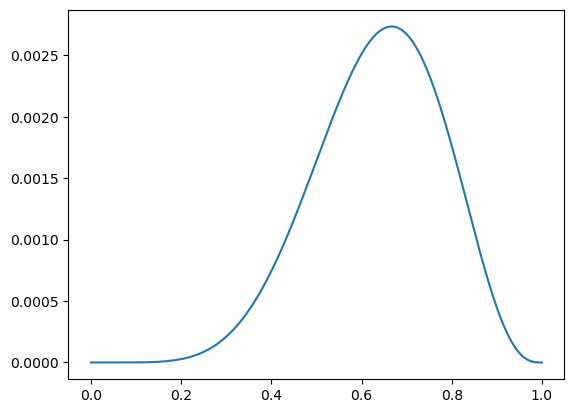

In [14]:
# plot posterior distribution
x = np.linspace(0,1,1000)
y = posterior

plt.plot(x, y)

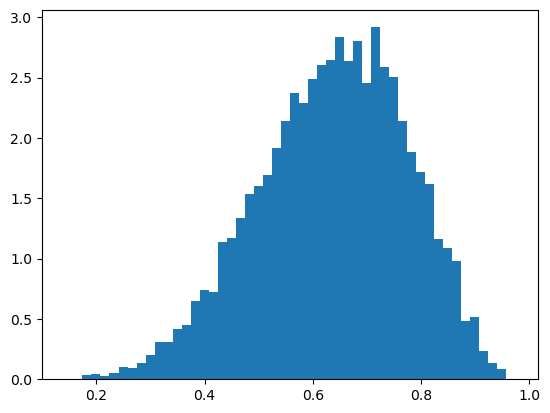

In [76]:
# plot samples
plt.hist(samples, bins=50, density=True, label='samples');

## Exercise 3E1
### How much posterior probability lies below p = 0.2  

In [31]:
# add up posterior probability where p < 0.2
print(np.sum(posterior [p_grid < 0.2]))


0.000856095129421848


In [39]:
# add up sample values for p < 0.2 and divide by total number of samples
print(np.sum(samples < 0.2)  / 1e4)

0.0013


## Exercise 3E2
### How much posterior probability lies above 0.8

In [41]:
# add up posterior probabilities where p > 0.8
print(np.sum(posterior [p_grid > 0.8]))

0.12034491402214355


In [42]:
# add up sample values for p > 0.8 and divide by total number of samples
print(np.sum(samples > 0.8)  / 1e4)

0.1155


## Exercise 3E3
### How much posterior probability lies between p = 0.2 and p = 0.8

In [43]:
# add up posterior probabilities in the range 0.2 < p < 0.8
print(np.sum(posterior[(p_grid > 0.2) & (p_grid < 0.8)]))

0.8787989908484345


In [37]:
# add up sample values between p = 0.2 and p = 0.8 and divide by total numbers of samples
print(np.sum((samples > 0.2) & (samples < 0.8)) / 1e4)

0.8832


## Exercise 3E4
### 20% of posterior probability lies below which value of p?

In [50]:
## Find the 0.2 quantile of samples
print(np.quantile(samples, 0.2))

0.5175175175175175


In [75]:
## Find the 0.2 quantile using the posterior distribution
p_grid_idx = np.max(np.where(posterior.cumsum()<0.2))
print(p_grid[p_grid_idx])

0.5155155155155156


## Exercise 3E5
### 20% of the posterior probability lies above which value of p?

In [58]:
# Find the 0.8 quantile of samples
print(np.quantile(samples, 0.8))

0.7577577577577578


## Exercise 3E6
### Which interval p contain the narrowest interval equal to 66% of the posterior probability

In [63]:
# Compute the 66% highest posterior density interval (HPDI) using the arviz library
lower, upper = az.hdi(samples, hdi_prob=0.66)
print(lower, upper)

0.5225225225225225 0.7907907907907907


## Exercise 3E7
### Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [64]:
lower, upper = np.quantile(samples, [(0.17), (1-0.17)])
print(lower, upper)

0.4994994994994995 0.7717717717717718


In [67]:
print(np.sum(posterior[(p_grid > 0.49) & (p_grid < 0.77)]))

0.665228525927632
